## Convolutional Neural Network (CNN)

It is a deep learning algorithm primarily used for image and video recognition. CNNs automatically and adaptively learn spatial hierarchies of features from input images through backpropagation. They consist of several layers, including convolutional layers, pooling layers, and fully connected layers.

### Filters/Kernels
They are small matrices used to detect features in the input image, such as edges, textures, and patterns. During the convolution operation, it slide over the input image, performing element-wise multiplication and summation to produce feature maps. 


### Padding
It refers to the addition of extra pixels around the border of an image. This is done to control the spatial size of the output. It helps to preserve the original input size after convolution, preventing loss of information at the image edges. Common types are "VALID"(no padding) and "SAME" (output size same as input).


### Strides
It determines the step size by which the convolutional filter moves across the input image. A stride of 1 means teh filter moves one pixel at a time, while a stride of 2 means it moves two pixels at a time.


### Tensorflow Implementation

In [1]:
from sklearn.datasets import load_sample_image

In [2]:
china = load_sample_image("china.jpg")/255
flower = load_sample_image("flower.jpg")/255

In [3]:
import numpy as np

In [8]:
images = np.array([china, flower])

In [10]:
batch_size, height, width, channels = images.shape

In [11]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

In [12]:
import tensorflow as tf

In [13]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

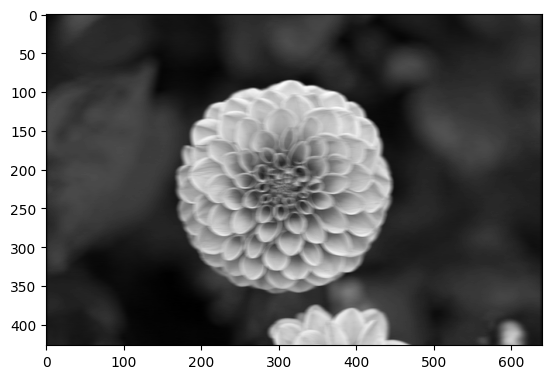

In [16]:
plt.imshow(outputs[1, :, :, 1], cmap="gray")
plt.show()

### Pooling Layer

It reduce the spatial dimensions of the input, which helps in decreasing the computational load and controlling overfitting. It is used after a convolutional layer.

Max Pooling: Select the maximum value from each sub-region of the input. 

Average Pooling: Calculates the average value of each sub-region of the input.

Min Pooling: Select the minimum value from each sub-region of the input.

L2 Pooling: Uses the L2 Norm (Euclidean norm) to pool values.

Global Pooling: Applies pooling over the entire input, resulting in a single value for each feature map.

In [2]:
import tensorflow as tf
from tensorflow import keras

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1